In [16]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn import tree


In [17]:
def get_datasets():
    # My python only likes absolute paths 
    brca = pd.read_csv('C:\\Users\\sohai\\PycharmProjects\\ComputationalBiologyLabs\\TCGA-BRCA.gistic.tsv', sep='\t')
    ovca = pd.read_csv('C:\\Users\sohai\\PycharmProjects\\ComputationalBiologyLabs\\TCGA-OV.gistic.tsv', sep='\t')
    brca.set_index('Gene Symbol', inplace=True)
    ovca.set_index('Gene Symbol', inplace=True)
    brca = brca.transpose()
    ovca = ovca.transpose()
    brca['BRCA'] = 1
    ovca['BRCA'] = 0
    df = pd.concat([brca, ovca[1:]])
    print(len(df), len(brca.transpose()-2) + len(ovca.transpose()-2))
    return df
df = get_datasets()

1658 49554


In [18]:
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [19]:
y = df["BRCA"]
X = df[df.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [20]:
# Hyper parameter tuning 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


param_dist = {"max_depth": [3,None],
             "min_samples_leaf": randint(1,9),
             "criterion": ["gini","entropy"],
             }

t = tree.DecisionTreeClassifier()
# Cross validation is at 5 now
tree_cv = RandomizedSearchCV(t,param_dist,cv=5)
tree_cv.fit(X_train,y_train)

print("Tuned Decision tree params: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision tree params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}
Best score is 0.8846846846846846


0.8868613138686131


,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7,BRCA
TCGA-3C-AAAU-01,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,...,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,1
TCGA-3C-AALI-01,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,...,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,1
TCGA-3C-AALJ-01,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,...,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,1
TCGA-3C-AALK-01,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,...,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,1
TCGA-4H-AAAK-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-72-4241-01,0.339,0.339,0.339,0.339,0.339,0.339,0.339,0.339,0.339,0.339,...,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,0
TCGA-OY-A56P-01,0.813,0.813,0.813,0.813,0.813,0.813,0.813,0.813,0.813,0.813,...,-0.080,-0.080,-0.080,-0.080,-0.080,-0.080,-0.080,-0.080,-0.080,0
TCGA-OY-A56Q-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.195,-0.195,-0.195,-0.195,-0.195,-0.195,-0.195,-0.195,-0.195,0
TCGA-VG-A8LO-01,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,...,-0.675,-0.675,-0.675,-0.675,-0.675,-0.675,-0.675,-0.675,-0.675,0


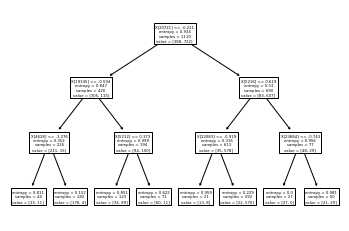

In [21]:
# Making the decision tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 2)
clf = clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
tree.plot_tree(clf)
df